In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import time
import glob
import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm

/Applications/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
genre_track_data = pd.read_csv('../MSD-Data/datasets/genre_track_data.csv')
lyrics_data = pd.read_csv('../MSD-Data/datasets/data_final.csv')

In [3]:
lyrics_data_new = lyrics_data[(lyrics_data.artist_familiarity > 0) & (lyrics_data.artist_hotttnesss > 0)]

# Relationship Between Artist Familiarity & Hotttnesss

In [4]:
lm = smf.ols(formula='artist_hotttnesss ~ artist_familiarity', data=lyrics_data_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      artist_hotttnesss   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                 1.364e+07
Date:                Sat, 10 Dec 2016   Prob (F-statistic):               0.00
Time:                        13:49:34   Log-Likelihood:             1.4504e+07
No. Observations:            10506557   AIC:                        -2.901e+07
Df Residuals:                10506555   BIC:                        -2.901e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.0433      0.000    379.599      0.000         0.043     0.044
artist_familiarity     0.6321      0.000   3693.509      0.000         0.632     0.632
==============================================================================
Omnibus:                  2463650.280   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12648938.081
Skew:                           1.043   Prob(JB):                         0.00
Kurtosis:                       7.954   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
X_new = pd.DataFrame({'artist_familiarity': [lyrics_data_new.artist_familiarity.min(), lyrics_data_new.artist_familiarity.max()]})
preds = lm.predict(X_new)

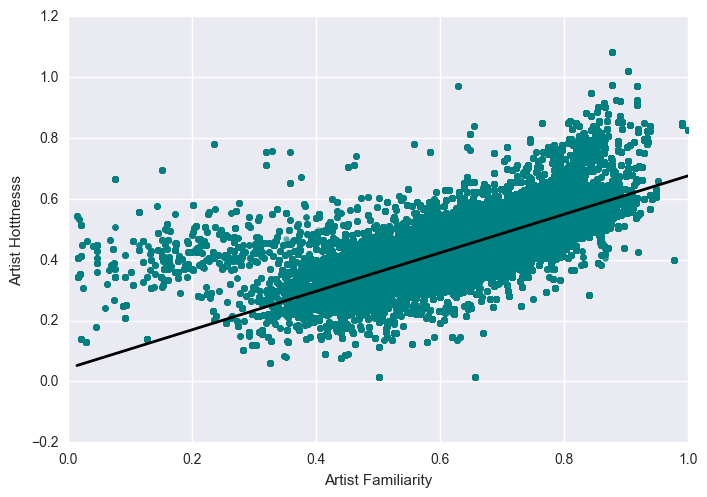

In [6]:
plt.scatter(lyrics_data_new.artist_familiarity, lyrics_data_new.artist_hotttnesss, lw=0, alpha=.2, color='#008080')
plt.xlabel("Artist Familiarity")
plt.ylabel("Artist Hotttnesss")
plt.xlim((0,1))
plt.plot(X_new, preds, c='black', linewidth=2)

Intercept of 0.0433	reflects the predicted artist hotttnesss score for artists whose familiarity score is 0. For every additional 0.1 point in familiarity score, you can expect artist hotttnesss to increase by an average of 0.06321. 

## Large Dataset: Relationship between Artist Familiarity and Hotttnesss

###  Grouped by specific genres 

In [7]:
lyrics_data_genres = lyrics_data[lyrics_data.genre_id.isin(['Pop_Rock', 'Latin', 'Rap', 'Electronic', 'Country'])]
lyrics_data_genres = lyrics_data_genres[(lyrics_data.artist_hotttnesss > 0) & (lyrics_data.artist_familiarity > 0)]

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


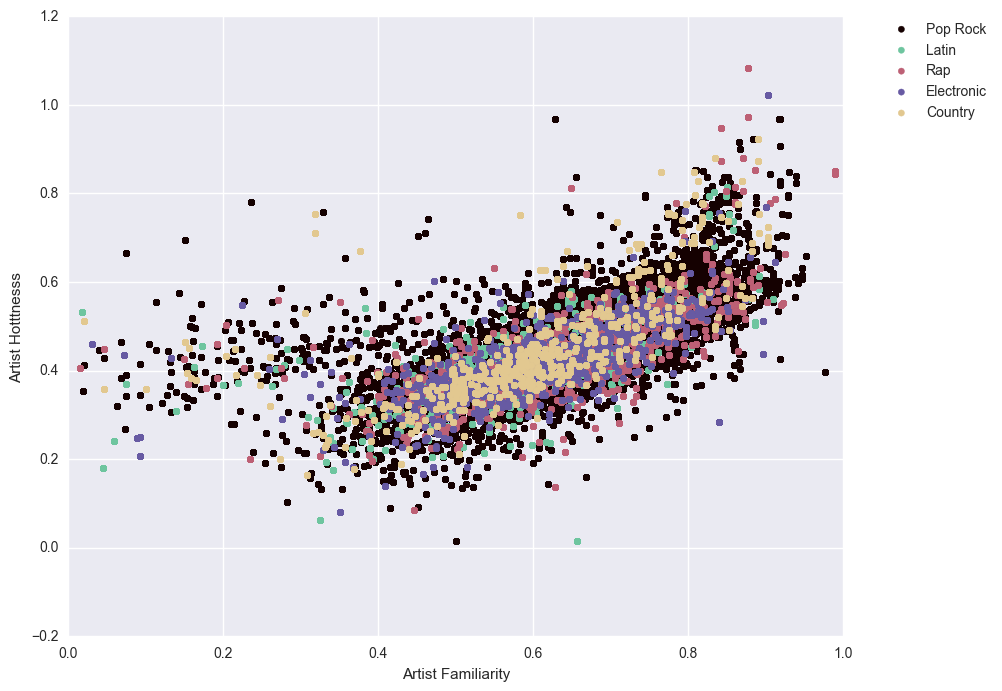

In [36]:
# Create a figure
plt.figure(figsize=(10,8))

# Create a scatterplot of... 
            # Pop_Rock
plt.scatter(lyrics_data_genres['artist_familiarity'][lyrics_data_genres['genre_id'] == 'Pop_Rock'],
            lyrics_data_genres['artist_hotttnesss'][lyrics_data_genres['genre_id'] == 'Pop_Rock'],
            # the color
            color='#150101',
            # labelled this
            label='Pop Rock')

            # Latin
plt.scatter(lyrics_data_genres['artist_familiarity'][lyrics_data_genres['genre_id'] == 'Latin'],
            lyrics_data_genres['artist_hotttnesss'][lyrics_data_genres['genre_id'] == 'Latin'],
            # the color
            color='#6ec59f',
            # alpha
            # labelled this
            label='Latin')

            # Rap
plt.scatter(lyrics_data_genres['artist_familiarity'][lyrics_data_genres['genre_id'] == 'Rap'],
            lyrics_data_genres['artist_hotttnesss'][lyrics_data_genres['genre_id'] == 'Rap'],
            # the color
            color='#bd6075',
            # labelled this
            label='Rap')

            # Electronic
plt.scatter(lyrics_data_genres['artist_familiarity'][lyrics_data_genres['genre_id'] == 'Electronic'],
            lyrics_data_genres['artist_hotttnesss'][lyrics_data_genres['genre_id'] == 'Electronic'],
            # the color
            color='#675aa3',
            # labelled this
            label='Electronic')

            # Country
plt.scatter(lyrics_data_genres['artist_familiarity'][lyrics_data_genres['genre_id'] == 'Country'],
            lyrics_data_genres['artist_hotttnesss'][lyrics_data_genres['genre_id'] == 'Country'],
            # the color
            color='#e2c890',
            # labelled this
            label='Country')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim((0,1))
plt.xlabel('Artist Familiarity')
plt.ylabel('Artist Hotttnesss')

In [9]:
lyrics_data_genres_2 = lyrics_data[lyrics_data.genre_id.isin(['Pop_Rock', 'Latin', 'Rap', 'Electronic', 'Country', 'RnB'])]
lyrics_data_genres_2 = lyrics_data_genres_2[(lyrics_data_genres_2.artist_hotttnesss > 0) & (lyrics_data_genres_2.artist_familiarity > 0)]

In [10]:
lm = smf.ols(formula='artist_hotttnesss ~ artist_familiarity + C(genre_id)', data=lyrics_data_genres_2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      artist_hotttnesss   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                 2.098e+06
Date:                Sat, 10 Dec 2016   Prob (F-statistic):               0.00
Time:                        13:58:14   Log-Likelihood:             1.3309e+07
No. Observations:             9642865   AIC:                        -2.662e+07
Df Residuals:                 9642858   BIC:                        -2.662e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     0.0587      0.000    394.577      0.000         0.058     0.059
C(genre_id)[T.Electronic]    -0.0276      0.000   -182.231      0.000        -0.028    -0.027
C(genre_id)[T.Latin]         -0.0216      0.000   -149.258      0.000        -0.022    -0.021
C(genre_id)[T.Pop_Rock]      -0.0183   9.32e-05   -196.776      0.000        -0.019    -0.018
C(genre_id)[T.Rap]           -0.0248      0.000   -223.243      0.000        -0.025    -0.025
C(genre_id)[T.RnB]           -0.0080      0.000    -62.228      0.000        -0.008    -0.008
artist_familiarity            0.6354      0.000   3509.959      0.000         0.635     0.636
==============================================================================
Omnibus:                  2300814.767   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12022582.179
Skew:                           1.057   Prob(JB):                         0.00
Kurtosis:                       8.045   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### With the addition of the categorical variable "genre_id," nothing really changes to the model. Each artist most likely is under the same genre, although we joined the genre datasets via track id.

## How does model differ per genre?

#### Large Dataset

In [11]:
PopRock = lyrics_data_genres_2[lyrics_data_genres_2.genre_id == 'Pop_Rock']
Latin = lyrics_data_genres_2[lyrics_data_genres_2.genre_id == 'Latin']
Rap = lyrics_data_genres_2[lyrics_data_genres_2.genre_id == 'Rap']
Electronic = lyrics_data_genres_2[lyrics_data_genres_2.genre_id == 'Electronic']
Country = lyrics_data_genres_2[lyrics_data_genres_2.genre_id == 'Country']
RnB = lyrics_data_genres_2[lyrics_data_genres_2.genre_id == 'RnB']

In [12]:
pop_lm = smf.ols(formula='artist_hotttnesss ~ artist_familiarity', data=PopRock).fit()
pop_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      artist_hotttnesss   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                 9.733e+06
Date:                Sat, 10 Dec 2016   Prob (F-statistic):               0.00
Time:                        13:59:41   Log-Likelihood:             1.0433e+07
No. Observations:             7315979   AIC:                        -2.087e+07
Df Residuals:                 7315977   BIC:                        -2.087e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.0482      0.000    359.802      0.000         0.048     0.048
artist_familiarity     0.6236      0.000   3119.840      0.000         0.623     0.624
==============================================================================
Omnibus:                  1222757.561   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5145910.546
Skew:                           0.777   Prob(JB):                         0.00
Kurtosis:                       6.803   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
latin_lm = smf.ols(formula='artist_hotttnesss ~ artist_familiarity', data=Latin).fit()
latin_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      artist_hotttnesss   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                 2.288e+05
Date:                Sat, 10 Dec 2016   Prob (F-statistic):               0.00
Time:                        13:59:42   Log-Likelihood:             4.0254e+05
No. Observations:              290626   AIC:                        -8.051e+05
Df Residuals:                  290624   BIC:                        -8.051e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.0915      0.001    130.661      0.000         0.090     0.093
artist_familiarity     0.5456      0.001    478.297      0.000         0.543     0.548
==============================================================================
Omnibus:                    32388.637   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           158808.497
Skew:                           0.443   Prob(JB):                         0.00
Kurtosis:                       6.511   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
rap_lm = smf.ols(formula='artist_hotttnesss ~ artist_familiarity', data=Rap).fit()
rap_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      artist_hotttnesss   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                 9.050e+05
Date:                Sat, 10 Dec 2016   Prob (F-statistic):               0.00
Time:                        13:59:42   Log-Likelihood:             1.0924e+06
No. Observations:              890847   AIC:                        -2.185e+06
Df Residuals:                  890845   BIC:                        -2.185e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.0439      0.000     97.716      0.000         0.043     0.045
artist_familiarity     0.6207      0.001    951.307      0.000         0.619     0.622
==============================================================================
Omnibus:                   429749.523   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4318467.570
Skew:                           2.090   Prob(JB):                         0.00
Kurtosis:                      12.944   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
electronic_lm = smf.ols(formula='artist_hotttnesss ~ artist_familiarity', data=Electronic).fit()
electronic_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      artist_hotttnesss   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                 3.392e+05
Date:                Sat, 10 Dec 2016   Prob (F-statistic):               0.00
Time:                        13:59:42   Log-Likelihood:             3.9144e+05
No. Observations:              252448   AIC:                        -7.829e+05
Df Residuals:                  252446   BIC:                        -7.829e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.0845      0.001    136.843      0.000         0.083     0.086
artist_familiarity     0.5524      0.001    582.448      0.000         0.551     0.554
==============================================================================
Omnibus:                    99759.450   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1864445.615
Skew:                           1.431   Prob(JB):                         0.00
Kurtosis:                      16.002   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
country_lm = smf.ols(formula='artist_hotttnesss ~ artist_familiarity', data=Country).fit()
country_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      artist_hotttnesss   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                 7.090e+05
Date:                Sat, 10 Dec 2016   Prob (F-statistic):               0.00
Time:                        13:59:43   Log-Likelihood:             5.4749e+05
No. Observations:              452740   AIC:                        -1.095e+06
Df Residuals:                  452738   BIC:                        -1.095e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             -0.0570      0.001    -89.135      0.000        -0.058    -0.056
artist_familiarity     0.8126      0.001    842.032      0.000         0.811     0.815
==============================================================================
Omnibus:                   132640.757   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           534526.783
Skew:                           1.410   Prob(JB):                         0.00
Kurtosis:                       7.514   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
rnb_lm = smf.ols(formula='artist_hotttnesss ~ artist_familiarity', data=RnB).fit()
rnb_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      artist_hotttnesss   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                 6.456e+05
Date:                Sat, 10 Dec 2016   Prob (F-statistic):               0.00
Time:                        13:59:43   Log-Likelihood:             5.5221e+05
No. Observations:              440225   AIC:                        -1.104e+06
Df Residuals:                  440223   BIC:                        -1.104e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             -0.0378      0.001    -56.980      0.000        -0.039    -0.036
artist_familiarity     0.7638      0.001    803.462      0.000         0.762     0.766
==============================================================================
Omnibus:                    85944.699   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           258250.718
Skew:                           1.018   Prob(JB):                         0.00
Kurtosis:                       6.152   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

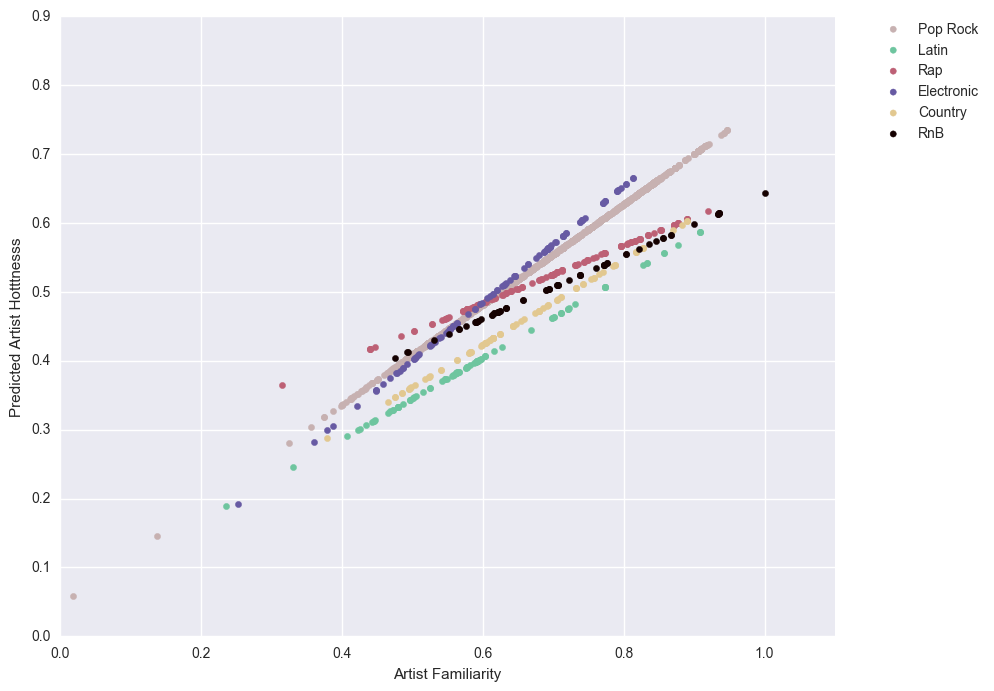

In [35]:
# Create a figure
plt.figure(figsize=(10,8))

# Create a scatter plot of... 
            # Pop_Rock
plt.scatter(PopRock.artist_familiarity, 
            pop_lm.params[0] + pop_lm.params[1]*PopRock.artist_familiarity.values,
            # the color
            color='#c7b1b1',
            # labelled this
            label='Pop Rock')

            # Latin
plt.scatter(Latin.artist_familiarity, 
            latin_lm.params[0] + latin_lm.params[1]*Latin.artist_familiarity.values,
            # the color
            color='#6ec59f',
            # labelled this
            label='Latin')

            # Rap
plt.scatter(Rap.artist_familiarity, 
            rap_lm.params[0] + rap_lm.params[1]*Rap.artist_familiarity.values,
            # the color
            color='#bd6075',
            # labelled this
            label='Rap')

            # Electronic
plt.scatter(Electronic.artist_familiarity, 
            electronic_lm.params[0] + electronic_lm.params[1]*Electronic.artist_familiarity.values,
            # the color
            color='#675aa3',
            # labelled this
            label='Electronic')

            # Country
plt.scatter(Country.artist_familiarity, 
            country_lm.params[0] + country_lm.params[1]*Country.artist_familiarity.values,
            # the color
            color='#e2c890',
            # labelled this
            label='Country')

            # RnB
plt.scatter(RnB.artist_familiarity, 
            rnb_lm.params[0] + rnb_lm.params[1]*RnB.artist_familiarity.values,
            # the color
            color='#150101',
            # labelled this
            label='RnB')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim((0,1.1))
plt.ylim((0,0.9))
plt.xlabel('Artist Familiarity')
plt.ylabel('Predicted Artist Hotttnesss')

#### Small Dataset

In [20]:
genre_track_data_2 = genre_track_data[genre_track_data.genre_id.isin(['Pop_Rock', 'Latin', 'Rap', 'Electronic', 'Country', 'RnB'])]
genre_track_data_2 = pd.DataFrame(genre_track_data_2)
genre_track_data_2 = genre_track_data_2[(genre_track_data_2.artist_hotttnesss != 0) & (genre_track_data_2.artist_familiarity != 0) & (genre_track_data_2.song_hotttnesss != 0) & (genre_track_data_2.year != 0)]

In [21]:
PopRock = genre_track_data_2[genre_track_data_2.genre_id == 'Pop_Rock']
Latin = genre_track_data_2[genre_track_data_2.genre_id == 'Latin']
Rap = genre_track_data_2[genre_track_data_2.genre_id == 'Rap']
Electronic = genre_track_data_2[genre_track_data_2.genre_id == 'Electronic']
Country = genre_track_data_2[genre_track_data_2.genre_id == 'Country']
RnB = genre_track_data_2[genre_track_data_2.genre_id == 'RnB']

In [22]:
pop_lm = smf.ols(formula='artist_hotttnesss ~ artist_familiarity', data=PopRock).fit()
pop_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      artist_hotttnesss   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2409.
Date:                Sat, 10 Dec 2016   Prob (F-statistic):          2.38e-293
Time:                        14:03:24   Log-Likelihood:                 1609.4
No. Observations:                1247   AIC:                            -3215.
Df Residuals:                    1245   BIC:                            -3205.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             -0.0162      0.010     -1.577      0.115        -0.036     0.004
artist_familiarity     0.7254      0.015     49.080      0.000         0.696     0.754
==============================================================================
Omnibus:                      288.489   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              856.291
Skew:                           1.158   Prob(JB):                    1.14e-186
Kurtosis:                       6.335   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
latin_lm = smf.ols(formula='artist_hotttnesss ~ artist_familiarity', data=Latin).fit()
latin_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      artist_hotttnesss   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     237.9
Date:                Sat, 10 Dec 2016   Prob (F-statistic):           2.64e-28
Time:                        14:03:30   Log-Likelihood:                 145.88
No. Observations:                 103   AIC:                            -287.8
Df Residuals:                     101   BIC:                            -282.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             -0.0118      0.028     -0.423      0.673        -0.067     0.043
artist_familiarity     0.7048      0.046     15.425      0.000         0.614     0.795
==============================================================================
Omnibus:                       34.520   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.941
Skew:                           1.224   Prob(JB):                     3.59e-19
Kurtosis:                       6.714   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
rap_lm = smf.ols(formula='artist_hotttnesss ~ artist_familiarity', data=Rap).fit()
rap_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      artist_hotttnesss   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     125.8
Date:                Sat, 10 Dec 2016   Prob (F-statistic):           1.78e-21
Time:                        14:03:35   Log-Likelihood:                 113.09
No. Observations:                 149   AIC:                            -222.2
Df Residuals:                     147   BIC:                            -216.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             -0.1019      0.055     -1.868      0.064        -0.210     0.006
artist_familiarity     0.8619      0.077     11.214      0.000         0.710     1.014
==============================================================================
Omnibus:                       77.904   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.146
Skew:                           2.098   Prob(JB):                     1.19e-57
Kurtosis:                       7.962   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
electronic_lm = smf.ols(formula='artist_hotttnesss ~ artist_familiarity', data=Electronic).fit()
electronic_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      artist_hotttnesss   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     235.1
Date:                Sat, 10 Dec 2016   Prob (F-statistic):           1.78e-29
Time:                        14:03:41   Log-Likelihood:                 187.73
No. Observations:                 116   AIC:                            -371.5
Df Residuals:                     114   BIC:                            -366.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.0439      0.025      1.771      0.079        -0.005     0.093
artist_familiarity     0.5980      0.039     15.333      0.000         0.521     0.675
==============================================================================
Omnibus:                       14.435   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               46.836
Skew:                           0.197   Prob(JB):                     6.76e-11
Kurtosis:                       6.088   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
country_lm = smf.ols(formula='artist_hotttnesss ~ artist_familiarity', data=Country).fit()
country_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      artist_hotttnesss   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     81.95
Date:                Sat, 10 Dec 2016   Prob (F-statistic):           2.67e-14
Time:                        14:03:47   Log-Likelihood:                 93.586
No. Observations:                  92   AIC:                            -183.2
Df Residuals:                      90   BIC:                            -178.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             -0.0009      0.055     -0.015      0.988        -0.110     0.108
artist_familiarity     0.7553      0.083      9.053      0.000         0.590     0.921
==============================================================================
Omnibus:                       15.931   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.832
Skew:                           1.099   Prob(JB):                     8.14e-05
Kurtosis:                       3.283   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
rnb_lm = smf.ols(formula='artist_hotttnesss ~ artist_familiarity', data=RnB).fit()
rnb_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      artist_hotttnesss   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     256.1
Date:                Sat, 10 Dec 2016   Prob (F-statistic):           2.97e-25
Time:                        14:03:57   Log-Likelihood:                 91.131
No. Observations:                  73   AIC:                            -178.3
Df Residuals:                      71   BIC:                            -173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             -0.2325      0.047     -4.941      0.000        -0.326    -0.139
artist_familiarity     1.0447      0.065     16.005      0.000         0.915     1.175
==============================================================================
Omnibus:                        1.941   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.379   Jarque-Bera (JB):                1.290
Skew:                           0.135   Prob(JB):                        0.525
Kurtosis:                       3.593   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

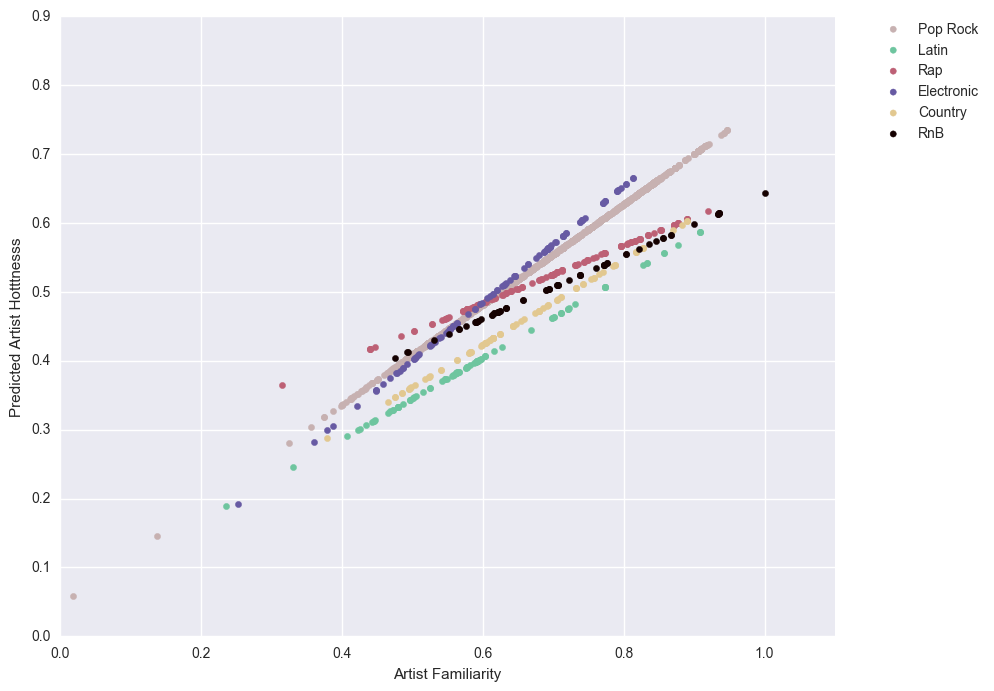

In [34]:
# Create a figure
plt.figure(figsize=(10,8))

# Create a scatter plot of... 
            # Pop_Rock
plt.scatter(PopRock.artist_familiarity, 
            pop_lm.params[0] + pop_lm.params[1]*PopRock.artist_familiarity.values,
            # the color
            color='#c7b1b1',
            # labelled this
            label='Pop Rock')

            # Latin
plt.scatter(Latin.artist_familiarity, 
            latin_lm.params[0] + latin_lm.params[1]*Latin.artist_familiarity.values,
            # the color
            color='#6ec59f',
            # labelled this
            label='Latin')

            # Rap
plt.scatter(Rap.artist_familiarity, 
            rap_lm.params[0] + rap_lm.params[1]*Rap.artist_familiarity.values,
            # the color
            color='#bd6075',
            # labelled this
            label='Rap')

            # Electronic
plt.scatter(Electronic.artist_familiarity, 
            electronic_lm.params[0] + electronic_lm.params[1]*Electronic.artist_familiarity.values,
            # the color
            color='#675aa3',
            # labelled this
            label='Electronic')

            # Country
plt.scatter(Country.artist_familiarity, 
            country_lm.params[0] + country_lm.params[1]*Country.artist_familiarity.values,
            # the color
            color='#e2c890',
            # labelled this
            label='Country')

            # RnB
plt.scatter(RnB.artist_familiarity, 
            rnb_lm.params[0] + rnb_lm.params[1]*RnB.artist_familiarity.values,
            # the color
            color='#150101',
            # labelled this
            label='RnB')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim((0,1.1))
plt.ylim((0,0.9))
plt.xlabel('Artist Familiarity')
plt.ylabel('Predicted Artist Hotttnesss')

## Small Dataset: Artist Familiarity Predicting Song Hotttnesss

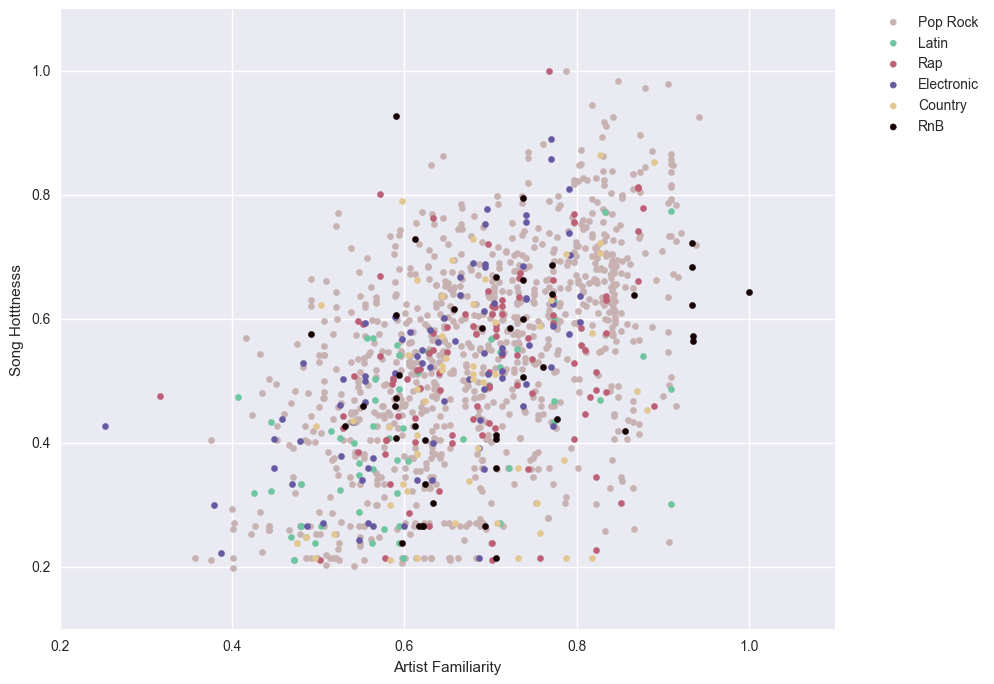

In [30]:
# Create a figure
plt.figure(figsize=(10,8))

# Create a scatterplot of... 
            # Pop_Rock
plt.scatter(genre_track_data_2['artist_familiarity'][genre_track_data_2['genre_id'] == 'Pop_Rock'],
            genre_track_data_2['song_hotttnesss'][genre_track_data_2['genre_id'] == 'Pop_Rock'],
            # the color
            color='#c7b1b1',
            # labelled this
            label='Pop Rock')

            # Latin
plt.scatter(genre_track_data_2['artist_familiarity'][genre_track_data_2['genre_id'] == 'Latin'],
            genre_track_data_2['song_hotttnesss'][genre_track_data_2['genre_id'] == 'Latin'],
            # the color
            color='#6ec59f',
            # alpha
            # labelled this
            label='Latin')

            # Rap
plt.scatter(genre_track_data_2['artist_familiarity'][genre_track_data_2['genre_id'] == 'Rap'],
            genre_track_data_2['song_hotttnesss'][genre_track_data_2['genre_id'] == 'Rap'],
            # the color
            color='#bd6075',
            # labelled this
            label='Rap')

            # Electronic
plt.scatter(genre_track_data_2['artist_familiarity'][genre_track_data_2['genre_id'] == 'Electronic'],
            genre_track_data_2['song_hotttnesss'][genre_track_data_2['genre_id'] == 'Electronic'],
            # the color
            color='#675aa3',
            # labelled this
            label='Electronic')

            # Country
plt.scatter(genre_track_data_2['artist_familiarity'][genre_track_data_2['genre_id'] == 'Country'],
            genre_track_data_2['song_hotttnesss'][genre_track_data_2['genre_id'] == 'Country'],
            # the color
            color='#e2c890',
            # labelled this
            label='Country')

            # RnB
plt.scatter(genre_track_data_2['artist_familiarity'][genre_track_data_2['genre_id'] == 'RnB'],
            genre_track_data_2['song_hotttnesss'][genre_track_data_2['genre_id'] == 'RnB'],
            # the color
            color='#150101',
            # labelled this
            label='RnB')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Artist Familiarity')
plt.ylabel('Song Hotttnesss')

#### Seems like there isn't a linear relationship. We could transform the data, but we can instead explore how the relationships differ by genre. 

In [31]:
pop_lm = smf.ols(formula='song_hotttnesss ~ artist_familiarity', data=PopRock).fit()
latin_lm = smf.ols(formula='song_hotttnesss ~ artist_familiarity', data=Latin).fit()
rap_lm = smf.ols(formula='song_hotttnesss ~ artist_familiarity', data=Rap).fit()
electronic_lm = smf.ols(formula='song_hotttnesss ~ artist_familiarity', data=Electronic).fit()
country_lm = smf.ols(formula='song_hotttnesss ~ artist_familiarity', data=Country).fit()
rnb_lm = smf.ols(formula='song_hotttnesss ~ artist_familiarity', data=RnB).fit()

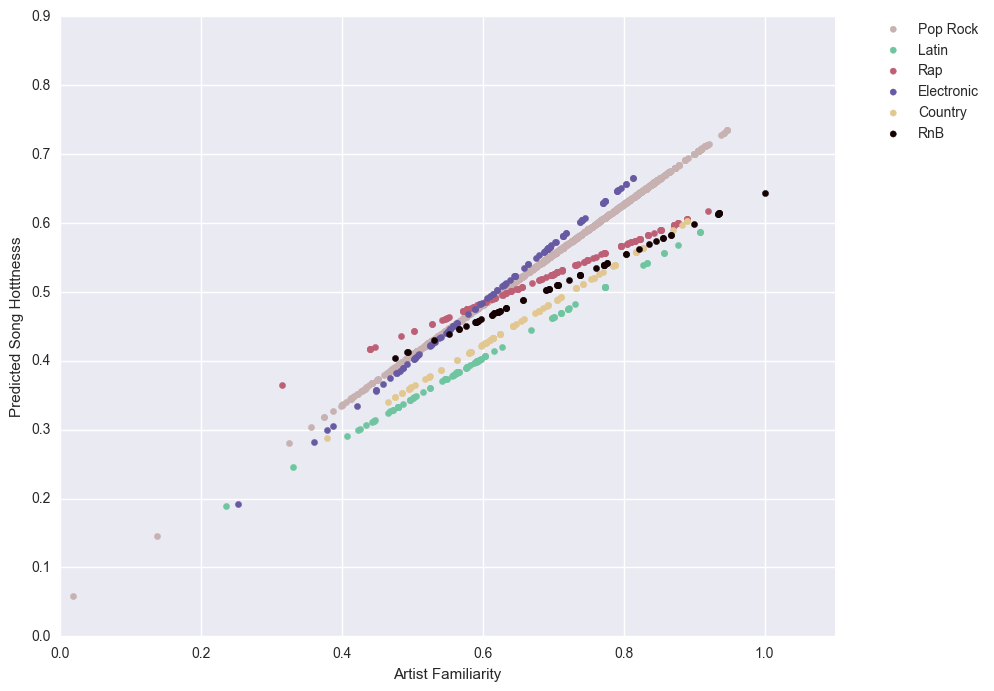

In [33]:
# Create a figure
plt.figure(figsize=(10,8))

# Create a scatter plot of... 
            # Pop_Rock
plt.scatter(PopRock.artist_familiarity, 
            pop_lm.params[0] + pop_lm.params[1]*PopRock.artist_familiarity.values,
            # the color
            color='#c7b1b1',
            # labelled this
            label='Pop Rock')

            # Latin
plt.scatter(Latin.artist_familiarity, 
            latin_lm.params[0] + latin_lm.params[1]*Latin.artist_familiarity.values,
            # the color
            color='#6ec59f',
            # labelled this
            label='Latin')

            # Rap
plt.scatter(Rap.artist_familiarity, 
            rap_lm.params[0] + rap_lm.params[1]*Rap.artist_familiarity.values,
            # the color
            color='#bd6075',
            # labelled this
            label='Rap')

            # Electronic
plt.scatter(Electronic.artist_familiarity, 
            electronic_lm.params[0] + electronic_lm.params[1]*Electronic.artist_familiarity.values,
            # the color
            color='#675aa3',
            # labelled this
            label='Electronic')

            # Country
plt.scatter(Country.artist_familiarity, 
            country_lm.params[0] + country_lm.params[1]*Country.artist_familiarity.values,
            # the color
            color='#e2c890',
            # labelled this
            label='Country')

            # RnB
plt.scatter(RnB.artist_familiarity, 
            rnb_lm.params[0] + rnb_lm.params[1]*RnB.artist_familiarity.values,
            # the color
            color='#150101',
            # labelled this
            label='RnB')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim((0,1.1))
plt.ylim((0,0.9))
plt.xlabel('Artist Familiarity')
plt.ylabel('Predicted Song Hotttnesss')